# 의사결정나무 실습

육군신체데이터를 이용하여 옷의 사이즈를 기준으로 입력 데이터에 따라 분류하는 프로그램을 제작

>[참고사이트](http://www.hila.co.kr/sizechart/sizechart04.htm)

In [1]:
from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image

필요한 모듈 임포트

In [2]:
if os.path.exists("MilitaryPeopleBodyData2.csv"):
    bodyDataFrame = pd.read_csv("MilitaryPeopleBodyData2.csv", index_col=0)
else:
    print ("Error")

모델링할 기초데이터들 입력

In [3]:
print("* bodyDataFrame.head()", bodyDataFrame.head(), sep="\n", end="\n\n")

* bodyDataFrame.head()
              sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
bust_circ_cm                                                          
101.9                  83.8      167.2         81.2            74.4   
96.3                   92.6      185.5         82.5            83.8   
98.6                   85.5      171.4         85.9            76.4   
99.5                   89.6      179.9         99.2            84.2   
122.3                  90.2      180.5        118.4            79.7   

              hd_circ_cm  foot_len_cm  weight_kg cloth_size  
bust_circ_cm                                                 
101.9               55.0         24.2       65.1          M  
96.3                57.1         28.5       73.2         XL  
98.6                54.5         27.4       71.6          M  
99.5                56.3         28.1       93.2          L  
122.3               61.5         29.0      114.2        XXL  



맨윗부분의 일부 데이터를 테스트겸 출력

In [4]:
print("* bodyDataFrame.tail()", bodyDataFrame.tail(), sep="\n", end="\n\n")

* bodyDataFrame.tail()
              sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
bust_circ_cm                                                          
106.8                  89.7      179.1        100.5            82.5   
112.0                  88.8      176.5        111.5            85.8   
117.7                  92.2      184.2        107.3            87.5   
91.5                   90.0      180.9         87.7            80.2   
101.8                  87.0      174.8        105.9            78.4   

              hd_circ_cm  foot_len_cm  weight_kg cloth_size  
bust_circ_cm                                                 
106.8               61.3         27.8       90.9          L  
112.0               61.3         27.0      104.2         XL  
117.7               61.4         27.7      110.0         XL  
91.5                61.5         27.3       74.1          L  
101.8               61.7         26.9       90.6         XL  



맨 아랫부분의 일부 데이터를 테스트겸 출력

In [5]:
print("* bodyDataFrame types:", bodyDataFrame["cloth_size"].unique(), sep="\n")

* bodyDataFrame types:
['M' 'XL' 'L' 'XXL' 'S']


분류할 카테고리들 추출

In [28]:
whereIsNull = pd.isnull(bodyDataFrame)
print (whereIsNull)
bodyDataFrame[whereIsNull] = 0

             sleeve_len_cm statur_cm wst_circ_cm crotch_hght_cm hd_circ_cm  \
bust_circ_cm                                                                 
101.9                False     False       False          False      False   
96.3                 False     False       False          False      False   
98.6                 False     False       False          False      False   
99.5                 False     False       False          False      False   
122.3                False     False       False          False      False   
94.7                 False     False       False          False      False   
89.6                 False     False       False          False      False   
98.0                 False     False       False          False      False   
122.3                False     False       False          False      False   
93.8                 False     False       False          False      False   
98.0                 False     False       False          False 

데이터 전처리 과정
>가끔 데이터들 중 비어있는 경우가 있어 해당 부분은 0으로 채움

In [7]:
bodyDataFrameBak = bodyDataFrame.copy()

데이터에서 문자로된 컬럼을 숫자로 바꾸기위한 데이터 백업 작업

In [8]:
clothSizeCategory = bodyDataFrameBak["cloth_size"].unique()
print (clothSizeCategory)

['M' 'XL' 'L' 'XXL' 'S']


카테고리 추출

In [9]:
clothCategoryToInt = {clothCate : cateNum for cateNum, clothCate in enumerate(clothSizeCategory)}
print (clothCategoryToInt)

{'S': 4, 'M': 0, 'L': 2, 'XL': 1, 'XXL': 3}


각 카테고리 명을 숫자로 변환

In [10]:
bodyDataFrame["cloth_size"] = bodyDataFrameBak["cloth_size"].replace(clothCategoryToInt)

변환된 내용을 기존 데이터에 갱신

In [11]:
print("* bodyDataFrame.head()", bodyDataFrame.head(), sep="\n", end="\n\n")

* bodyDataFrame.head()
              sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
bust_circ_cm                                                          
101.9                  83.8      167.2         81.2            74.4   
96.3                   92.6      185.5         82.5            83.8   
98.6                   85.5      171.4         85.9            76.4   
99.5                   89.6      179.9         99.2            84.2   
122.3                  90.2      180.5        118.4            79.7   

              hd_circ_cm  foot_len_cm  weight_kg  cloth_size  
bust_circ_cm                                                  
101.9               55.0         24.2       65.1           0  
96.3                57.1         28.5       73.2           1  
98.6                54.5         27.4       71.6           0  
99.5                56.3         28.1       93.2           2  
122.3               61.5         29.0      114.2           3  



맨 윗부분 테스트겸 출력

In [12]:
print("* bodyDataFrame.tail()", bodyDataFrame.tail(), sep="\n", end="\n\n")

* bodyDataFrame.tail()
              sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
bust_circ_cm                                                          
106.8                  89.7      179.1        100.5            82.5   
112.0                  88.8      176.5        111.5            85.8   
117.7                  92.2      184.2        107.3            87.5   
91.5                   90.0      180.9         87.7            80.2   
101.8                  87.0      174.8        105.9            78.4   

              hd_circ_cm  foot_len_cm  weight_kg  cloth_size  
bust_circ_cm                                                  
106.8               61.3         27.8       90.9           2  
112.0               61.3         27.0      104.2           1  
117.7               61.4         27.7      110.0           1  
91.5                61.5         27.3       74.1           2  
101.8               61.7         26.9       90.6           1  



맨 아랫부분 테스트겸 출력

In [13]:
print("* bodyDataFrame types:", bodyDataFrame["cloth_size"].unique(), sep="\n")

* bodyDataFrame types:
[0 1 2 3 4]


카테고리 테스트겸 출력

In [14]:
features = list(bodyDataFrame.columns[0:7])
print (features)

['sleeve_len_cm', 'statur_cm', 'wst_circ_cm', 'crotch_hght_cm', 'hd_circ_cm', 'foot_len_cm', 'weight_kg']


x축에 들어갈 데이터 컬럼들 선택

In [27]:
yCoordinate = bodyDataFrame["cloth_size"]
print ("* yCoordinate.head()", yCoordinate.head())

* yCoordinate.head() bust_circ_cm
101.9    0
96.3     1
98.6     0
99.5     2
122.3    3
Name: cloth_size, dtype: int64


y축에 들어갈 데이터 컬럼 

In [16]:
xCoordinate = bodyDataFrame[features]
print ("* xCoordinate.head()", xCoordinate.head())

* xCoordinate.head()               sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
bust_circ_cm                                                          
101.9                  83.8      167.2         81.2            74.4   
96.3                   92.6      185.5         82.5            83.8   
98.6                   85.5      171.4         85.9            76.4   
99.5                   89.6      179.9         99.2            84.2   
122.3                  90.2      180.5        118.4            79.7   

              hd_circ_cm  foot_len_cm  weight_kg  
bust_circ_cm                                      
101.9               55.0         24.2       65.1  
96.3                57.1         28.5       73.2  
98.6                54.5         27.4       71.6  
99.5                56.3         28.1       93.2  
122.3               61.5         29.0      114.2  


x축에 들어갈 데이터 컬럼 선택

In [17]:
decisionTreeModel = DecisionTreeClassifier(max_depth=4)

모델링 객체 생성 및 옵션 최대 깊이4로 설정

In [18]:
decisionTreeModel = decisionTreeModel.fit(xCoordinate, yCoordinate)

데이터 모델링

In [19]:
with open("decisionTreeModel.dot", "w") as decisionTreeModelFile:
    export_graphviz(decisionTreeModel, out_file=decisionTreeModelFile, feature_names=features)

dot파일로 추출

In [21]:
bodyDataFrameData = tree.export_graphviz(decisionTreeModel, out_file=None, feature_names=features, 
                                   class_names=features,filled = True, rounded = True, 
                                  special_characters = True)

In [22]:
graph = pydotplus.graph_from_dot_data(bodyDataFrameData)

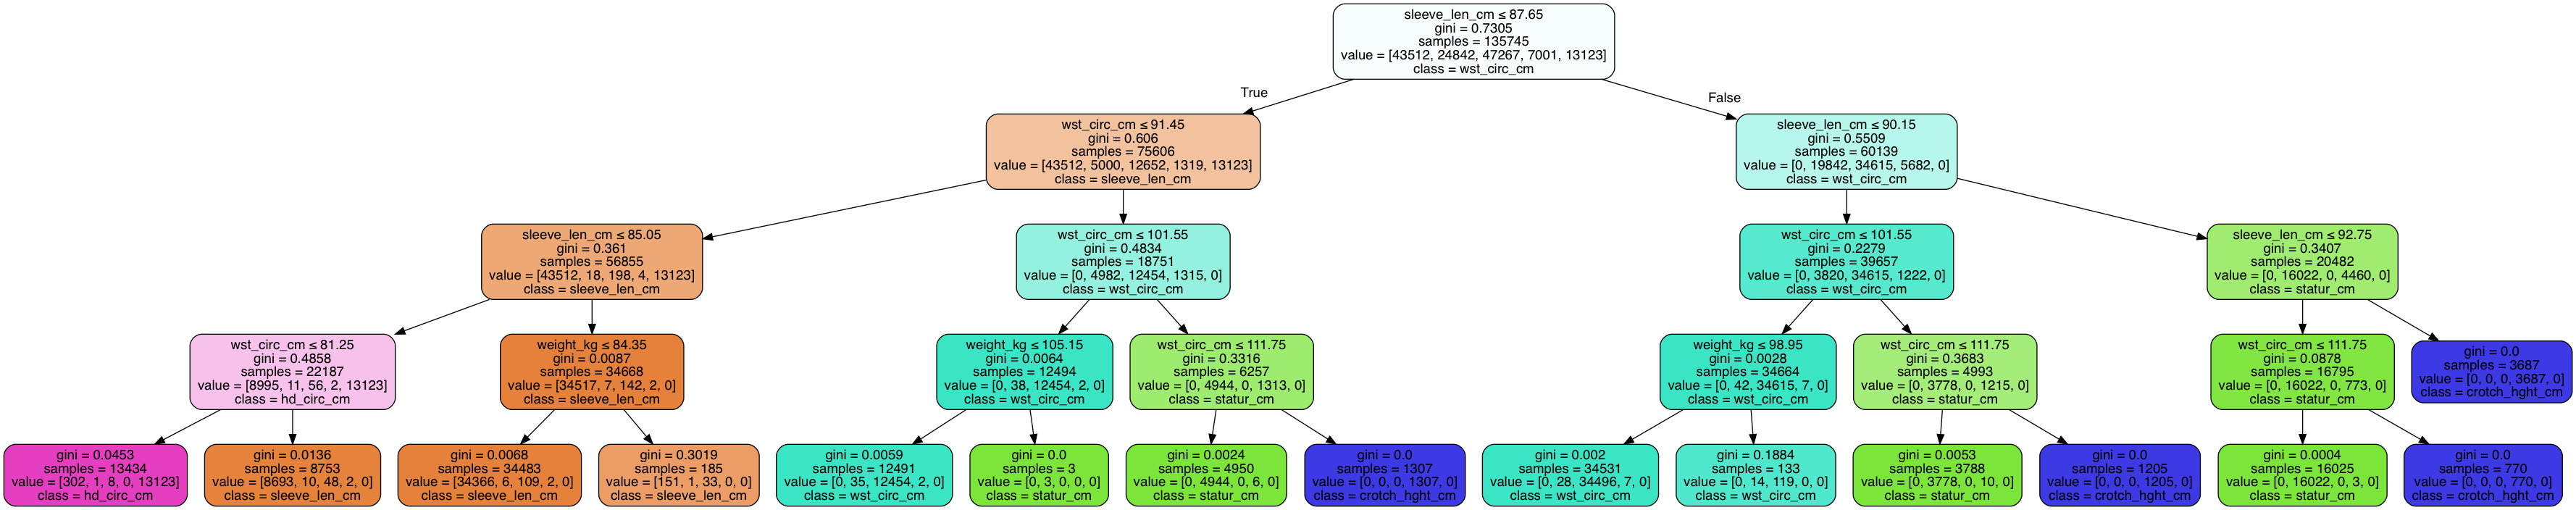

In [23]:
Image(graph.create_png())

이미지 그래프로 추출